In [1]:
src_dir = "../../../src"
import sys
sys.path.append(src_dir)

from install_if_missing import install_if_missing

install_if_missing("lifelines", verbose=True)

'lifelines' is already installed.


In [2]:
from lifelines import KaplanMeierFitter

from lifelines.statistics import logrank_test
from lifelines.statistics import multivariate_logrank_test

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
%matplotlib inline 

plt.style.use("ggplot")

In [4]:
from lifelines.datasets import load_rossi

rossi = load_rossi()
rossi

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3
...,...,...,...,...,...,...,...,...,...
427,52,0,1,31,0,1,0,1,3
428,52,0,0,20,1,0,0,1,1
429,52,0,1,20,1,1,1,1,1
430,52,0,0,29,1,1,0,1,3


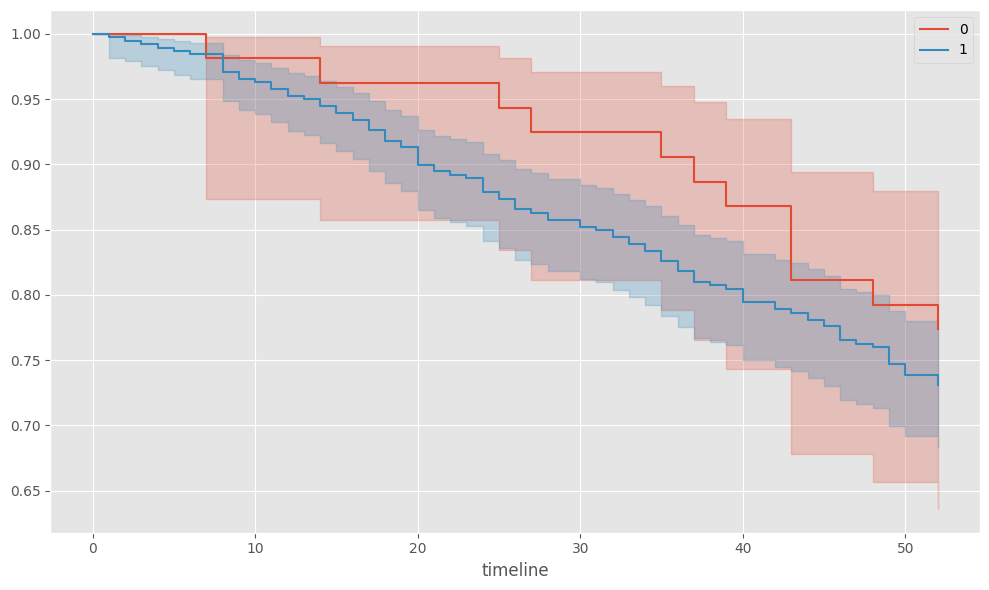

In [5]:
kmf = KaplanMeierFitter()

fig, ax = plt.subplots(figsize = (10, 6))       
for label, group in rossi.groupby("race"):
    kmf.fit(durations = group["week"], event_observed = group["arrest"], label = label)
    kmf.plot_survival_function(label=label, ax=ax)
fig.tight_layout()
plt.show()

In [6]:
# Split into two groups
group_white = rossi[rossi["race"] == 0]
group_black = rossi[rossi["race"] == 1]

# Perform the log-rank test
results = logrank_test(
    durations_A=group_white["week"],
    durations_B=group_black["week"],
    event_observed_A=group_white["arrest"],
    event_observed_B=group_black["arrest"]
)

# Print test summary
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.58 0.45      1.16

In [7]:
results = multivariate_logrank_test(
    event_durations=rossi["week"],
    groups=rossi["race"],
    event_observed=rossi["arrest"]
)

results.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
           0.58 0.45      1.16